1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib.ticker import MaxNLocator
from scipy.stats import norm, linregress, binned_statistic
from scipy import integrate
import seaborn as sns

In [2]:
N = 100
mean, std = [5, 1]
x = np.random.normal(loc=mean, scale=std, size=N)

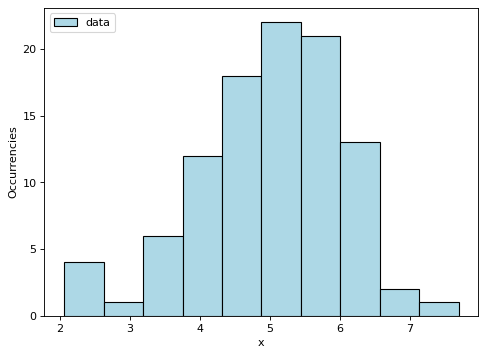

In [3]:
plt.figure(figsize=(7,5), dpi=80)
binning = int(np.sqrt(N))
# scott = int(3.49*std/np.cbrt(N))
rice = int(np.cbrt(N)*2)
n, bins, _ = plt.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="data")
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('Occurrencies')
# ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# fig.tight_layout()
plt.show()

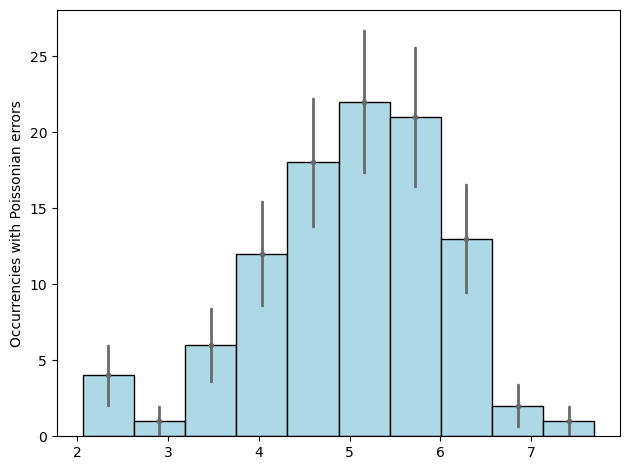

In [4]:
errors = np.sqrt(n)
pos = np.array([(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)])

plt.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="data")
plt.errorbar( x=pos, y=n, yerr=errors, fmt='.', capsize=1, color='dimgrey', elinewidth=2)
plt.ylabel('Occurrencies with Poissonian errors')
# ax.set_xticks(pos)
# ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.show()

In [5]:
# # Create gaussians from x
# gauss = np.array([np.random.normal(loc=i, scale=1.06*x.std()*x.size**(-1/5)) for i in x])
# gauss

In [6]:
# using scipy
gauss = norm.stats(loc=x, scale=1.06*x.std()*x.size**(-1/5))
# gauss

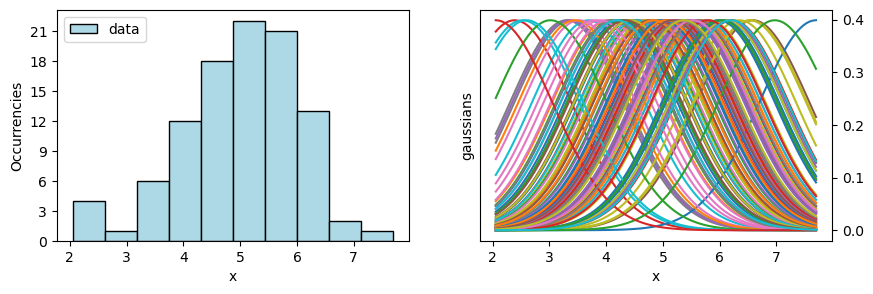

In [7]:
# Plot of all the gaussians
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
ax1.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="data")
ax1.legend(loc='upper left')
ax1.set_xlabel('x')
ax1.set_ylabel('Occurrencies')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
x_ax = np.linspace(min(x), max(x), 100)
cumulative = np.zeros(x_ax.shape)
for i in range(len(gauss[0])):
    current_gauss = norm.pdf(x=x_ax, loc=gauss[0][i]) # , scale=gauss[1][i]
    ax2.plot(x_ax, current_gauss)
    cumulative += current_gauss
ax2.set_xlabel('x')
ax2.set_ylabel('gaussians')
ax2.yaxis.tick_right()

Histogram area 56.38722218049598
Gaussian areas 95.07878203706862


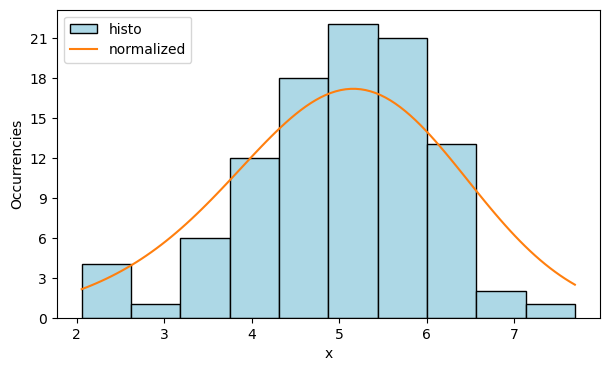

In [8]:
# area histo:
area_histo = sum(np.diff(bins)*n)
print("Histogram area", area_histo)
area_gaussians = integrate.trapz(cumulative, x_ax)
print("Gaussian areas", area_gaussians)
fig, ax1 = plt.subplots(figsize=(7, 4))
ax1.hist(x, bins=binning, facecolor='lightblue', edgecolor='black', label="histo")
ax1.set_xlabel('x')
ax1.set_ylabel('Occurrencies')
ax1.plot(x_ax, cumulative*area_histo/area_gaussians, label='normalized')
ax1.yaxis.set_major_locator(MaxNLocator(integer=True))
ax1.legend(loc='upper left');

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

In [9]:
import pandas as pd

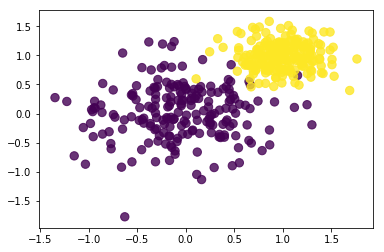

In [10]:
# ! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

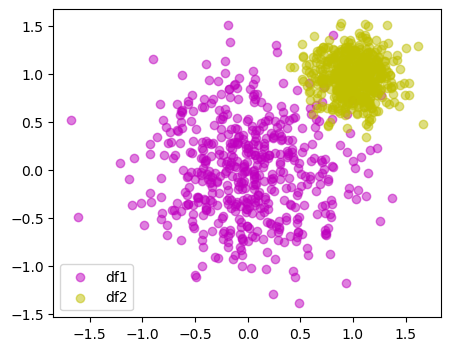

In [11]:
def make2Darray_normal(mean, std, length = 500):
    df = pd.DataFrame(np.random.normal(loc=mean, scale=std, size=(length, 2)), columns=['feature_1', 'feature_2'])
    return df
df1 = make2Darray_normal(0, 0.5)
df2 = make2Darray_normal(1, 0.2)

fig, ax1 = plt.subplots(figsize=(5, 4))
# ax1.set_xlabel('x')
# ax1.set_ylabel('Occurrencies')
ax1.scatter(df1['feature_1'], df1['feature_2'], label='df1', alpha=0.5, c='m')
ax1.scatter(df2['feature_1'], df2['feature_2'], label='df2', alpha=0.5, c='y')
ax1.legend(loc='lower left');

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [12]:
data = np.load(file='residuals_261.npy', allow_pickle=True).item()
df = pd.DataFrame(data=data)
df = df[abs(df['residuals']) < 2]
df

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
8,-0.042857,3.3
9,0.128571,5.3
10,0.085714,15.0
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


In [13]:
result = linregress(df['distances'], df['residuals'])
result

LinregressResult(slope=0.0032597701220305835, intercept=-0.15432816763069473, rvalue=0.043403510522559086, pvalue=8.717037183576464e-06, stderr=0.0007327014008445789, intercept_stderr=0.008458951961471835)

In [14]:
result.slope

0.0032597701220305835

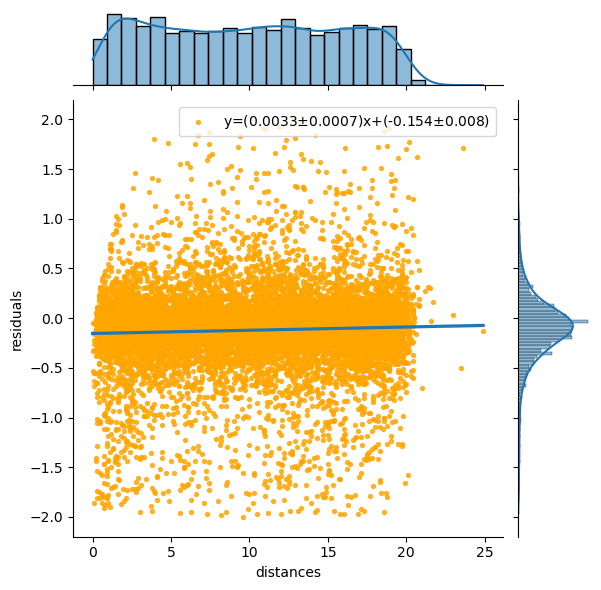

In [15]:
sns.jointplot(x="distances", y="residuals", data=df, kind='reg', scatter_kws={"color": "orange", "s": 8}, 
            label=f'y=({round(result.slope,4)}$\pm${round(result.stderr,4)})x+({round(result.intercept,3)}$\pm${round(result.intercept_stderr, 3)})');
ax = plt.gca()
ax.legend();

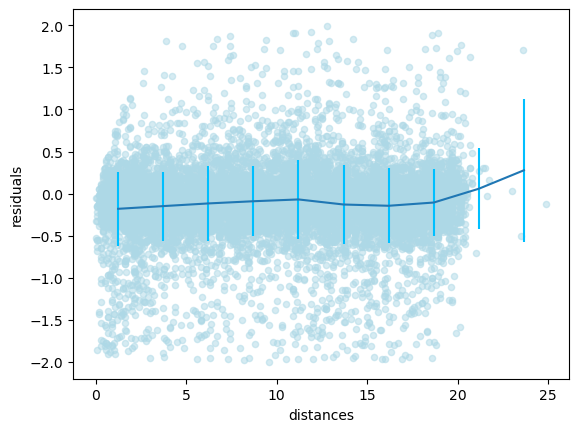

In [16]:
n, bins = np.histogram(df['distances'])
x = (bins[1:]+bins[:-1])*.5
y, _, _ = binned_statistic(x=df['distances'], values=df['residuals'], statistic='mean', bins=bins)
erry, _, _ = binned_statistic(x=df['distances'], values=df['residuals'], statistic='std', bins=bins)

df.plot.scatter(x='distances', y='residuals', c='Lightblue', alpha=0.5)
plt.errorbar(x, y, yerr=erry, ecolor='deepskyblue');